# HOMEWORK 4: Data Visualization
- **Name:** Abhishek Shirsat
- **UB Username:*** ashirsat
- **UB Person Number:*** 50320144
---
## Part 1 - Generate plots according to specification
### Problem 1 - Scatter plot with line

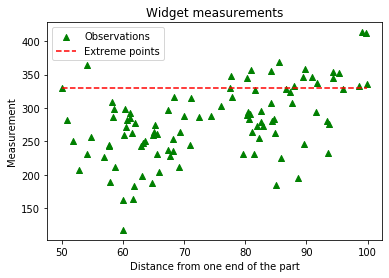

In [1]:
%matplotlib notebook
%matplotlib inline
import csv
import matplotlib.pyplot as plt

myX = []
myY = []
X_Y = {}
with open('scatter_data.csv','r') as csvfile1:
    csvreader1 = csv.reader(csvfile1)
    next(csvreader1)
    for row in csvreader1:
        if(row[0][0] != '%'):
            try:
                row[0] = float(row[0])
                row[1] = float(row[1])
            except ValueError:
                pass
            myX.append(row[0])
            myY.append(row[1])
    #     print(myX[4])
            X_Y = {int(myX[i]): int(myY[i]) for i in range(len(myX))}

#     print(X_Y)
#     print(myX)
#     print(myY)

    maxX = float('-inf')                       
    minX = float('inf')
    for i in range(0,len(myX)):
        if(myX[i] > maxX):
            maxX = myX[i]
        if(myX[i] < minX):
            minX = myX[i]
    intY = [int(l) for l in myY]
    intX = [int(m) for m in myX]
    
#     print(intY)
#     print(intX)
    for key in X_Y:
#         print(X_Y[key])
        if(key == min(intX)):
            minY = X_Y[key]
    plt.scatter(myX, myY,c = 'g',marker = '^',alpha='1',label = 'Observations')
    plt.xlabel('Distance from one end of the part')        
    plt.ylabel('Measurement')
    plt.title('Widget measurements') 
    #https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html  -- REF: for plotting line
    plt.hlines(minY, minX, maxX, color = 'r', linestyle = '--',label = 'Extreme points')     
    plt.legend()
    plt.show()
    

### Problem 2 - Histogram

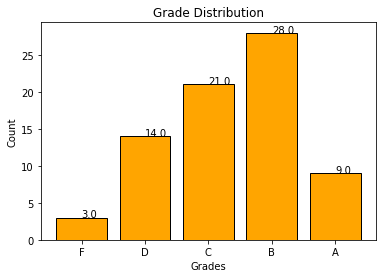

In [2]:
# ---- QUESTION 2 ---- #
%matplotlib notebook
%matplotlib inline
import csv
import matplotlib.pyplot as plt
ID = []
avg_score = []
with open('student_grades.csv','r') as csvfile2:
    csvreader2 = csv.reader(csvfile2)
    next(csvreader2)
    for row in csvreader2:
        if(row[0][0] != '%'):
            try:
                row[0] = int(row[0])
                row[1] = float(row[1])
            except ValueError:
                pass
            ID.append(row[0])
            avg_score.append(row[1])
    
    
#     print(avg_score)
    min_score = min(avg_score)
    avg_score_int = [int(i) for i in avg_score]
#     print(avg_score_int)
    avg_score_int.sort()
    grades = []
    for i in avg_score_int:
        if i >=90:
            G = 'A'
            grades.append(G)
        elif 80 <= i < 90:
            G = 'B'
            grades.append(G)
        elif 70 <= i < 80:
            G = 'C'
            grades.append(G)
        elif 60 <= i < 70:
            G = 'D'
            grades.append(G)
        else:
            G = 'F'
            grades.append(G)
    
    n,bins,patches = plt.hist(grades, bins = range(0,6,1),
             facecolor='orange',width = 0.8, rwidth = 0.8, alpha=1, align='left',
             edgecolor='black',linewidth=1)
    
    plt.xlabel('Grades')        
    plt.ylabel('Count')
    plt.title('Grade Distribution') 
    for i in range(0,5):
        plt.text(bins[i],n[i],str(n[i]))
        

### Problem 3 - Barplot and Boxplot in the Same Figure

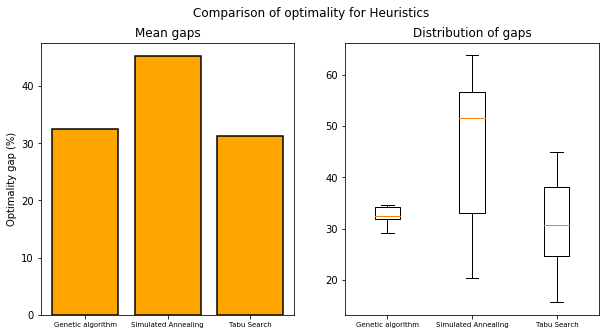

In [3]:
%matplotlib notebook
%matplotlib inline
import csv
import matplotlib.pyplot as plt

IDs = []
method = []
values = []
with open('solution_data.csv','r') as csvfile3:
    csvreader3 = csv.reader(csvfile3)
    next(csvreader3)
    for row in csvreader3:
        if(row[0][0] != '%'):
            try:
                row[0] = int(row[0])
                row[1] = str(row[1])
                row[2] = float(row[2])
            except ValueError:
                pass
        IDs.append(row[0])
        method.append(row[1])
        values.append(row[2])
#     print(len(values))
        
    gap_gen = []
    for i in range(3,len(values),4):
        gap_gen.append(((values[i]-values[i-3])/values[i])*100)
        
#     print(gap_gen)
    
    gap_sim = []
    for i in range(3,len(values),4):
        gap_sim.append(((values[i]-values[i-2])/values[i])*100)
#     print(gap_sim)
        
    gap_tabu = []
    for i in range(3,len(values),4):
        gap_tabu.append(((values[i]-values[i-1])/values[i])*100)
#     print(gap_tabu)
    
    all_gaps = [gap_gen,gap_sim,gap_tabu]
    mean_gen = sum(gap_gen)/len(gap_gen)
    mean_sim = sum(gap_sim)/len(gap_sim)
    mean_tabu = sum(gap_tabu)/len(gap_tabu)
    means = [mean_gen,mean_sim,mean_tabu]
#     print(means)
    name_method = ['Genetic algorithm','Simulated Annealing','Tabu Search']
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    fig.suptitle('Comparison of optimality for Heuristics')
    ax1.bar(name_method, means, color = 'orange',edgecolor = 'black',linewidth = 1.5)
    ax1.set_xticklabels(name_method,fontsize = 7)
    ax1.set_title("Mean gaps")       
    ax1.set_ylabel("Optimality gap (%)")  
    
    ax2.boxplot(all_gaps)
    ax2.set_title('Distribution of gaps')
    ax2.set_xticklabels(name_method,fontsize = 7)

    
    plt.show()

## Part 1 - Generate plots according to specification

### plot #1: 
>As part of a take home assignment in course IE 500: Supply Chain Engineering, we were given a dataset. 
**The question was:** 
>Jill Smith, who has joined recently as the forecasting manager for ABC company, is interested in developing quarterly forecasts for one of the company’s key products. She has collected data on quarterly sales for this product for the past 5 years and they are given in Table 2.22. Jill decides to use seasonality prediction methods. She also decides to use the first 4 years of data and predict the estimates in 2011 first.
###### URL for references used for line plot: 
> https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html

### For plot 2:
>The expenses dataset was obtained from mobile phone application named "Spliwise". Splitwise is an application that helps user keep track of the money they owe and are owed. It works such that user enters the Description for expense (for eg: Walmart - Home supplies) and it auto dectects the category based on the categories fed to it software code. Users can enter the number of people included for splitting and thus the logs can be maintained. I have used my expenses report for the time period: 14th August 2019 - 26th Feb 2020. 
###### URL for references used for line plot: 
> https://codebasicshub.com

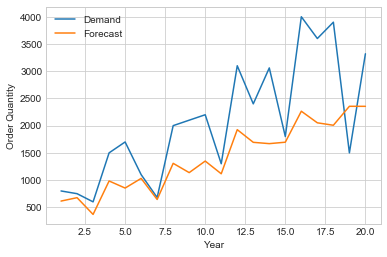

In [4]:
%matplotlib notebook
%matplotlib inline
import csv
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
year = []
demand = []
forecast = []
with open('demand_data_hw4.csv','r') as csvfile4:
    csvreader4 = csv.reader(csvfile4)
    next(csvreader4)
    for row in csvreader4:
        try:
            row[0] = int(row[0])
            row[1] = int(row[1])                
            row[2] = float(row[2])
        except ValueError:
            pass
        year.append(row[0])
        demand.append(row[1])
        forecast.append(row[2])
#     print(forecast)
#     print(demand)
#     print(year)
    sr_no = list(range(1,(len(demand)+1)))
#     print(sr_no)
    plt.plot(sr_no,demand, label = 'Demand')
    plt.plot(sr_no,forecast,label='Forecast')
    plt.xlabel('Year')
    plt.ylabel('Order Quantity')
    plt.legend()

<IPython.core.display.Javascript object>


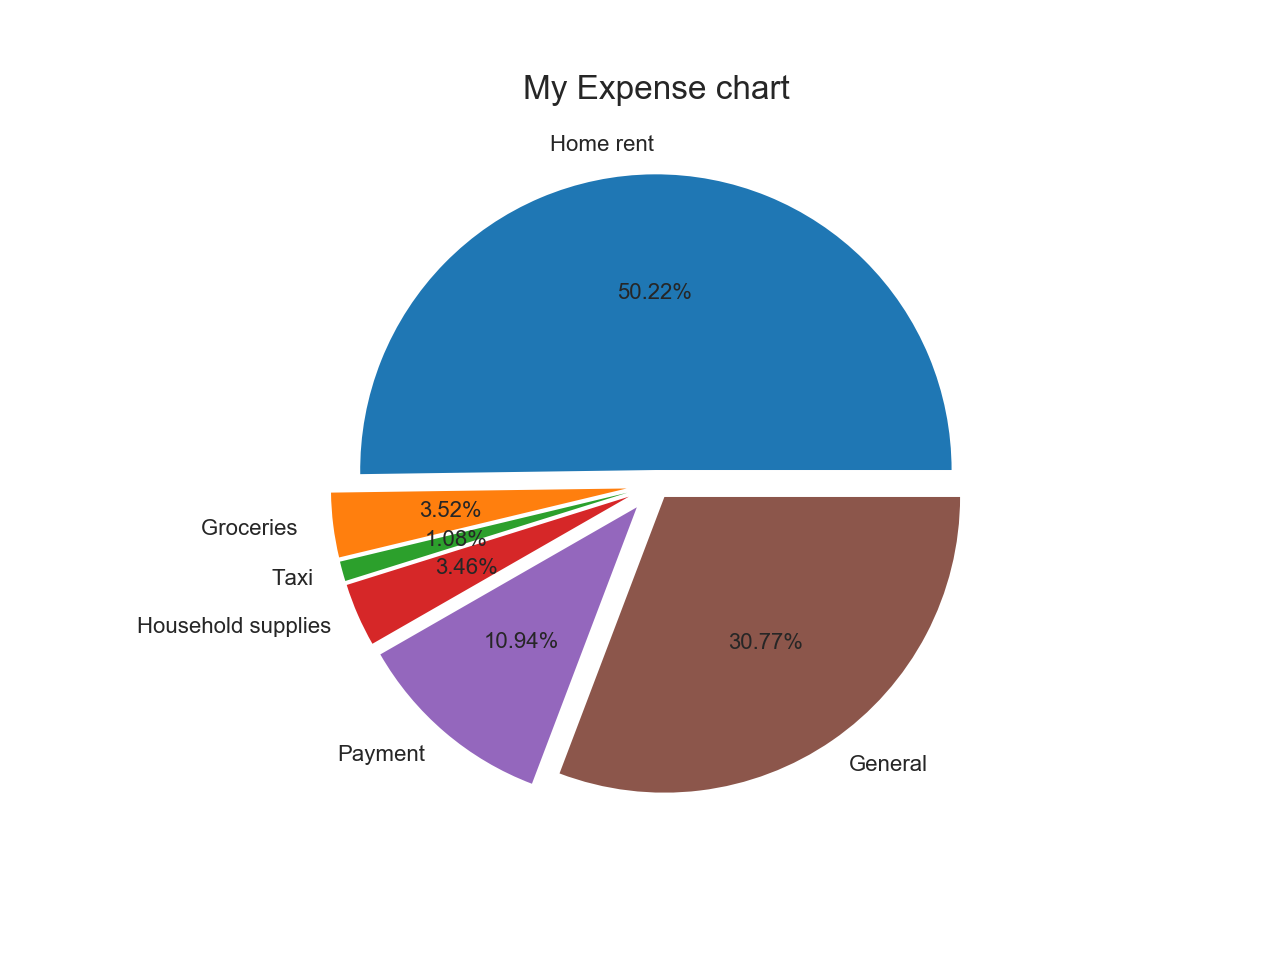

In [5]:
%matplotlib notebook
# %matplotlib inline
import csv
import matplotlib.pyplot as plt

category = []
expense = []

with open('my_splitwise_data.csv','r') as csvfile5:
    csvreader5 = csv.reader(csvfile5)
    next(csvreader5)
    for row in csvreader5:
        try:
            row[0] = str(row[0])
            row[1] = float(row[1])                
        except ValueError:
            pass
        category.append(row[0])
        expense.append(row[1])
#     print(category)
#     print(expense)
plt.axis('Equal')
plt.pie(expense,labels = category,autopct = '%.2f%%',explode = [0.05,0.1,0.1,0.1,0.1,0.05],textprops={'fontsize': 8})
plt.title('My Expense chart')
plt.show()